In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(parallel))
suppressMessages(library(ggrepel))
suppressMessages(library(circlize))

In [2]:
set.seed(42)
getwd()

addArchRThreads(threads = parallel::detectCores() - 2)
addArchRGenome("hg38")

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Fibroblast/code"

Setting default number of Parallel threads to 126.

Setting default genome to Hg38.



In [3]:
## subset atac project
proj <- loadArchRProject("../data/snATAC_SCARA5_Myofib", showLogo = FALSE)

Successfully loaded ArchRProject!



Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760d6c94980b-Date-2022-01-26_Time-09-14-41.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-26 09:14:41 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-26 09:14:41 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760d6c94980b-Date-2022-01-26_Time-09-14-41.log



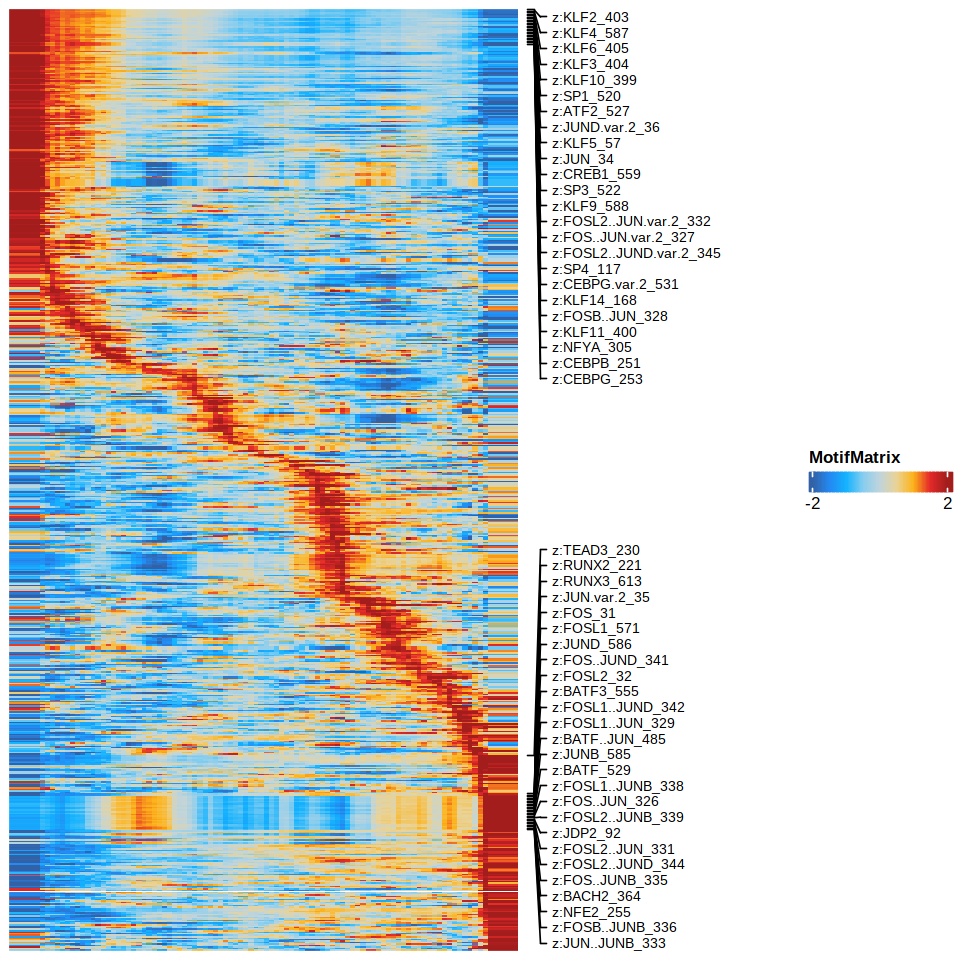

In [4]:
## we here assign a pseudo-time point label for each TF based on the its position in heatmap
trajMM  <- getTrajectory(ArchRProj = proj,
                         name = "SCARA5_Myofib_dm",
                         useMatrix = "MotifMatrix",
                         log2Norm = FALSE,
                         scaleTo = NULL,
                        smoothWindow = 11)

trajMM <- trajMM[!grepl("deviations", rownames(trajMM)), ]

p1 <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2))

options(repr.plot.height = 8, repr.plot.width = 8)

p1

In [5]:
matMM <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2),
                              returnMatrix = TRUE)
nrow(matMM)

head(matMM)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760d54d38af1-Date-2022-01-26_Time-09-14-45.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-26 09:14:45 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-26 09:14:45 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760d54d38af1-Date-2022-01-26_Time-09-14-45.log



[1] 633

,T.0_1,T.1_2,T.2_3,T.3_4,T.4_5,T.5_6,T.6_7,T.7_8,T.8_9,T.9_10,⋯,T.90_91,T.91_92,T.92_93,T.93_94,T.94_95,T.95_96,T.96_97,T.97_98,T.98_99,T.99_100
z:KLF2_403,2,2,2,2,2,2,1.900100,1.494594,1.455563,1.417185,⋯,-0.9289920,-0.9455552,-1.453018,-1.793866,-1.783382,-1.783382,-1.783382,-1.783382,-1.783382,-1.783382
z:KLF4_587,2,2,2,2,2,2,1.939798,1.476470,1.389212,1.338302,⋯,-0.7588416,-0.7657234,-1.362763,-1.778639,-1.798716,-1.798716,-1.798716,-1.798716,-1.798716,-1.798716
z:KLF6_405,2,2,2,2,2,2,1.887755,1.468093,1.426434,1.406617,⋯,-1.0126742,-1.0467252,-1.611264,-1.911566,-1.819489,-1.819489,-1.819489,-1.819489,-1.819489,-1.819489
z:KLF3_404,2,2,2,2,2,2,1.804796,1.445596,1.395481,1.398531,⋯,-1.0990469,-1.1864569,-1.621187,-1.971429,-1.982492,-1.982492,-1.982492,-1.982492,-1.982492,-1.982492
z:KLF10_399,2,2,2,2,2,2,1.891740,1.479959,1.369715,1.384002,⋯,-0.7869342,-0.8370752,-1.417404,-1.720288,-1.726700,-1.726700,-1.726700,-1.726700,-1.726700,-1.726700
z:SP1_520,2,2,2,2,2,2,2.000000,1.540444,1.446870,1.442614,⋯,-1.0552801,-1.0984140,-1.734951,-1.937937,-1.852277,-1.852277,-1.852277,-1.852277,-1.852277,-1.852277


In [6]:
df_tf_time_point <- data.frame(TF = rownames(matMM),
                              time_point = seq(1, 100, length.out = 633))

rownames(df_tf_time_point) <- rownames(matMM)
head(df_tf_time_point)

,TF,time_point
,<chr>,<dbl>
z:KLF2_403,z:KLF2_403,1.000000
z:KLF4_587,z:KLF4_587,1.156646
z:KLF6_405,z:KLF6_405,1.313291
z:KLF3_404,z:KLF3_404,1.469937
z:KLF10_399,z:KLF10_399,1.626582
z:SP1_520,z:SP1_520,1.783228


In [7]:
## load selected TFs by correlation analysis
df_tf <- read.csv("../data/snATAC_SCARA5_Myofib/sel_tf_by_expression.csv", row.names = 1)

head(df_tf)

,idx1,idx2,matchname1,matchname2,name1,name2,Correlation,VarAssay1,VarAssay2,TStat,Pval,FDR
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,17,3251,RELA,RELA,z:RELA_17,chr11:RELA,0.1537066,0.8278041,0.5642279,1.539917,0.12680337,0.9308782
6,20,15086,ZNF354C,ZNF354C,z:ZNF354C_20,chr5:ZNF354C,0.1032200,0.6714060,0.6586250,1.027314,0.30680183,0.9533176
7,21,6967,CTCF,CTCF,z:CTCF_21,chr16:CTCF,0.1207020,0.8436019,0.8611900,1.203690,0.23160901,0.9533176
14,37,14546,MEF2C,MEF2C,z:MEF2C_37,chr5:MEF2C,0.2249046,0.8088468,0.6963629,2.284981,0.02446968,0.5334390
18,50,7725,STAT3,STAT3,z:STAT3_50,chr17:STAT3,0.1020400,0.6271722,0.8251866,1.015445,0.31239421,0.9533176
19,53,16717,FOXP2,FOXP2,z:FOXP2_53,chr7:FOXP2,0.1169310,0.7898894,0.8924629,1.165554,0.24662388,0.9533176


In [8]:
## here we plot the TFs sorted by the pseudo-time points as previously defined 
df_tf_time_point <- df_tf_time_point[df_tf$name1, ]
df_tf$time_point <- df_tf_time_point$time_point
df_tf <- df_tf[order(df_tf$time_point), ]

head(df_tf)

,idx1,idx2,matchname1,matchname2,name1,name2,Correlation,VarAssay1,VarAssay2,TStat,Pval,FDR,time_point
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78,403,8979,KLF2,KLF2,z:KLF2_403,chr19:KLF2,0.2038822,0.9684044,0.9437086,2.061635,0.04188985,0.6087992,1.000000
121,587,18053,KLF4,KLF4,z:KLF4_587,chr9:KLF4,0.3020521,0.9620853,0.6206770,3.136673,0.00225647,0.1967642,1.156646
106,522,10716,SP3,SP3,z:SP3_522,chr2:SP3,0.2150925,0.9320695,0.9495427,2.180341,0.03162606,0.5515586,2.723101
67,305,15544,NFYA,NFYA,z:NFYA_305,chr6:NFYA,0.1377610,0.9115324,0.5905603,1.376892,0.17168285,0.9533176,4.289557
114,554,12155,ATF4,ATF4,z:ATF4_554,chr22:ATF4,0.1314385,0.8830964,0.7227478,1.312562,0.19239624,0.9533176,5.386076
129,600,17952,NFIL3,NFIL3,z:NFIL3_600,chr9:NFIL3,0.1279789,0.8657188,0.6592558,1.277431,0.20446827,0.9533176,7.735759


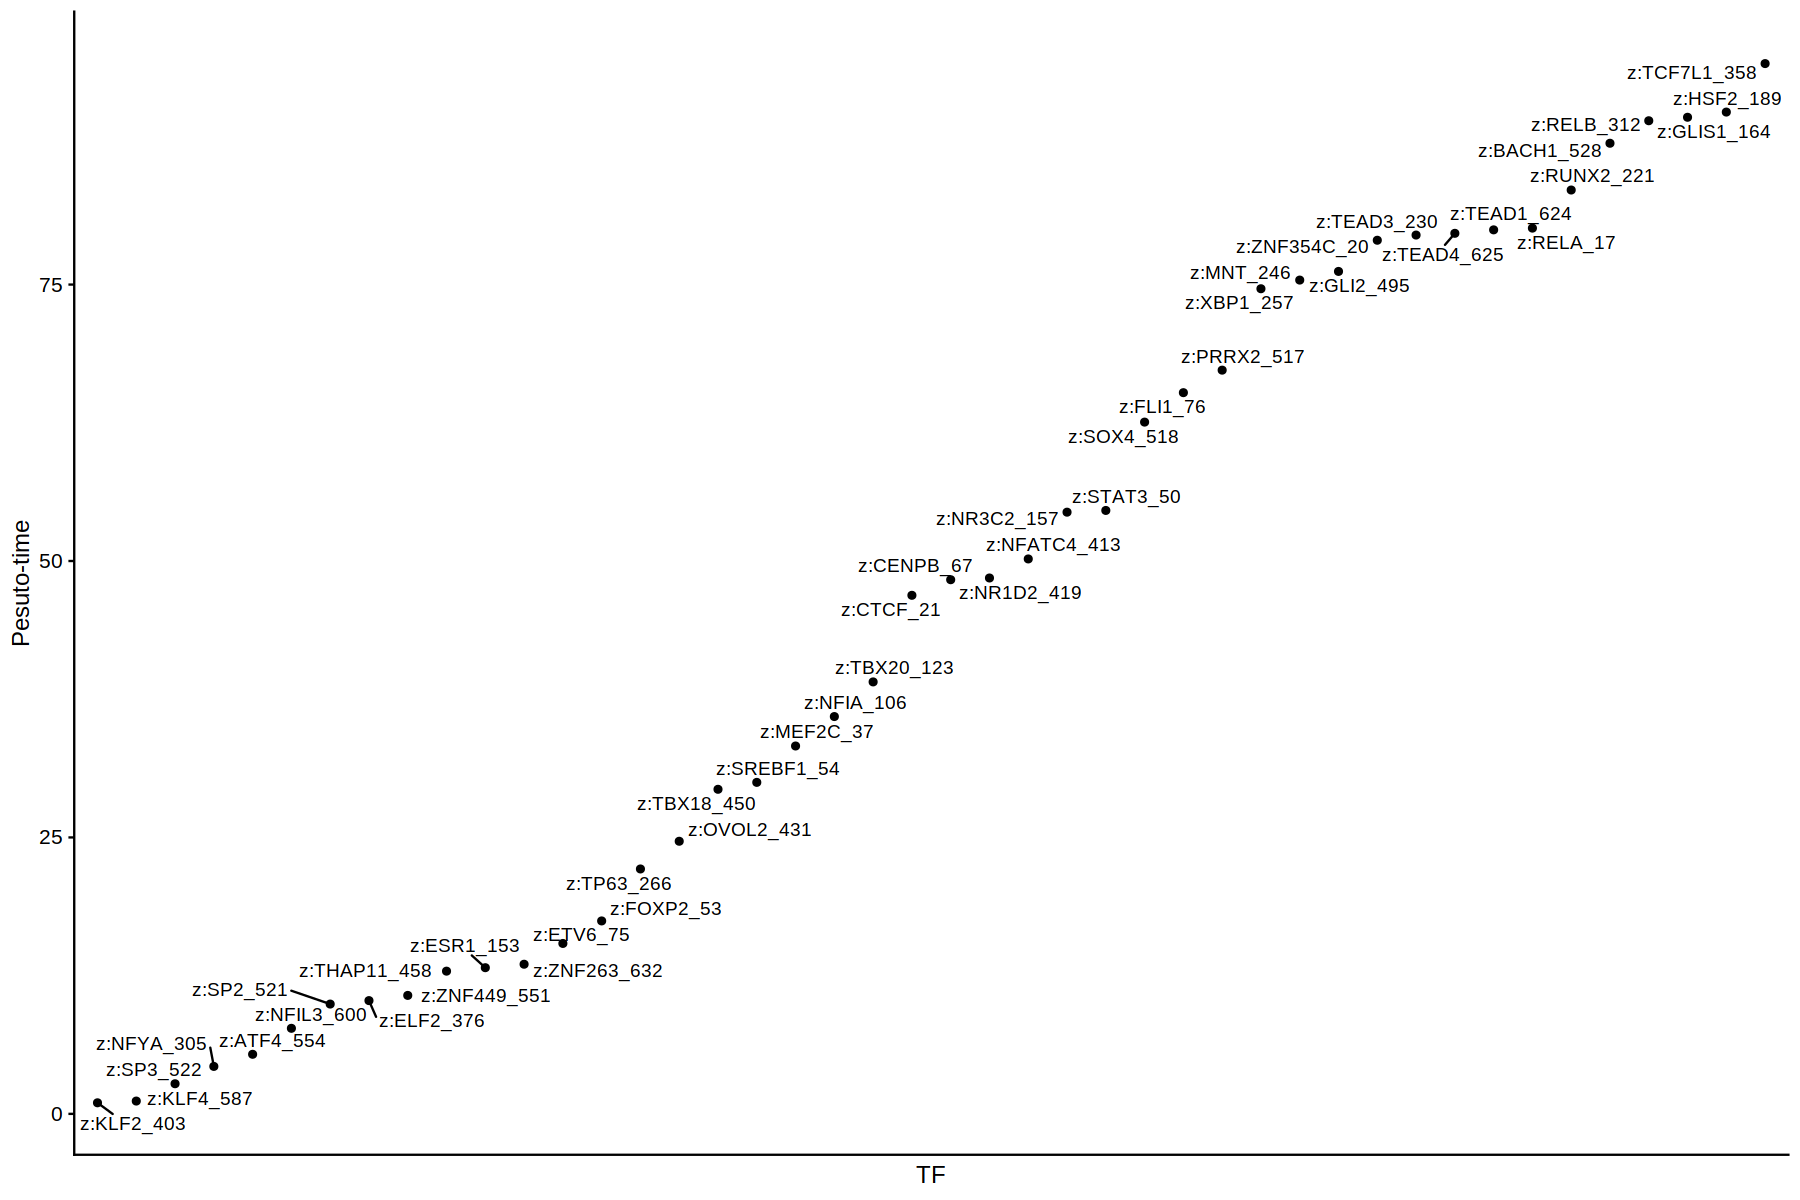

In [9]:
p <- ggplot(data = df_tf, aes(x = reorder(name1, time_point), y = time_point, label = name1)) +
    geom_point() +
    geom_text_repel() +
    xlab("TF") + ylab("Pesuto-time") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
         axis.ticks.x = element_blank())

options(repr.plot.height = 10, repr.plot.width = 15)

p

write.csv(df_tf, "../data/snATAC_SCARA5_Myofib/TF_time_point.csv")

In [10]:
## we next build TF-gene network based on the correlation of TF activity and gene expression

In [11]:
## first let's get tf activity and gene expression matrix along the trajectory
trajMM  <- getTrajectory(ArchRProj = proj,
                         name = "SCARA5_Myofib_dm",
                         useMatrix = "MotifMatrix",
                         log2Norm = FALSE,
                         scaleTo = NULL,
                        smoothWindow = 11)

trajMM <- trajMM[!grepl("deviations", rownames(trajMM)), ]

trajGEX <- getTrajectory(ArchRProj = proj,
                         name = "SCARA5_Myofib_dm",
                         useMatrix = "GeneExpressionMatrix",
                         log2Norm = TRUE,
                        smoothWindow = 11)

tf_activity <- plotTrajectoryHeatmap(trajMM, 
                            varCutOff = 0,
                            pal = paletteContinuous(set = "solarExtra"),
                            limits = c(-2, 2),
                           returnMatrix = TRUE)

gene_expression <- plotTrajectoryHeatmap(trajGEX,
                        varCutOff = 0.9,
                        pal = paletteContinuous(set = "horizonExtra"),
                        limits = c(-2, 2),
                                         returnMatrix = TRUE)

Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760db5ab675-Date-2022-01-26_Time-09-15-02.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-01-26 09:15:02 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2022-01-26 09:15:02 : 

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760db5ab675-Date-2022-01-26_Time-09-15-02.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-b760d2431f7e9-Date-2022-01-26_Time-09-15-03.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht

In [12]:
head(tf_activity)
head(gene_expression)

,T.0_1,T.1_2,T.2_3,T.3_4,T.4_5,T.5_6,T.6_7,T.7_8,T.8_9,T.9_10,⋯,T.90_91,T.91_92,T.92_93,T.93_94,T.94_95,T.95_96,T.96_97,T.97_98,T.98_99,T.99_100
z:KLF2_403,2,2,2,2,2,2,1.900100,1.494594,1.455563,1.417185,⋯,-0.9289920,-0.9455552,-1.453018,-1.793866,-1.783382,-1.783382,-1.783382,-1.783382,-1.783382,-1.783382
z:KLF4_587,2,2,2,2,2,2,1.939798,1.476470,1.389212,1.338302,⋯,-0.7588416,-0.7657234,-1.362763,-1.778639,-1.798716,-1.798716,-1.798716,-1.798716,-1.798716,-1.798716
z:KLF6_405,2,2,2,2,2,2,1.887755,1.468093,1.426434,1.406617,⋯,-1.0126742,-1.0467252,-1.611264,-1.911566,-1.819489,-1.819489,-1.819489,-1.819489,-1.819489,-1.819489
z:KLF3_404,2,2,2,2,2,2,1.804796,1.445596,1.395481,1.398531,⋯,-1.0990469,-1.1864569,-1.621187,-1.971429,-1.982492,-1.982492,-1.982492,-1.982492,-1.982492,-1.982492
z:KLF10_399,2,2,2,2,2,2,1.891740,1.479959,1.369715,1.384002,⋯,-0.7869342,-0.8370752,-1.417404,-1.720288,-1.726700,-1.726700,-1.726700,-1.726700,-1.726700,-1.726700
z:SP1_520,2,2,2,2,2,2,2.000000,1.540444,1.446870,1.442614,⋯,-1.0552801,-1.0984140,-1.734951,-1.937937,-1.852277,-1.852277,-1.852277,-1.852277,-1.852277,-1.852277


,T.0_1,T.1_2,T.2_3,T.3_4,T.4_5,T.5_6,T.6_7,T.7_8,T.8_9,T.9_10,⋯,T.90_91,T.91_92,T.92_93,T.93_94,T.94_95,T.95_96,T.96_97,T.97_98,T.98_99,T.99_100
chr3:PCOLCE2,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.911464,1.820656,1.891962,⋯,-1.0551072,-1.0310971,-1.0494265,-1.0943677,-1.1267927,-1.1267927,-1.1267927,-1.1267927,-1.1267927,-1.1267927
chr8:SCARA5,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.947554,1.896040,⋯,-0.5837856,-0.6152117,-0.7004977,-0.6476685,-0.7507156,-0.7507156,-0.7507156,-0.7507156,-0.7507156,-0.7507156
chr7:SDK1,1.782181,1.782181,1.782181,1.782181,1.782181,1.782181,1.692772,1.668100,1.651542,1.647396,⋯,-0.6158370,-0.5637610,-0.6299809,-0.6430957,-0.8230578,-0.8230578,-0.8230578,-0.8230578,-0.8230578,-0.8230578
chr1:UAP1,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.974695,1.818394,1.799603,1.859479,⋯,-0.6456419,-0.6696940,-0.6556953,-0.6585852,-0.5859250,-0.5859250,-0.5859250,-0.5859250,-0.5859250,-0.5859250
chr18:ZBTB7C,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,⋯,-0.9807516,-0.9769244,-0.9507731,-0.8322024,-0.8336563,-0.8336563,-0.8336563,-0.8336563,-0.8336563,-0.8336563
chr20:PLCB1,1.536287,1.536287,1.536287,1.536287,1.536287,1.536287,1.455542,1.289545,1.373181,1.470684,⋯,-0.8993177,-0.9039852,-0.8976588,-0.8828782,-1.0017770,-1.0017770,-1.0017770,-1.0017770,-1.0017770,-1.0017770


In [13]:
dim(tf_activity)
dim(gene_expression)

[1] 633 100

[1] 1902  100

In [14]:
## here we filter the TFs according to our correlation analysis
tf_activity <- tf_activity[df_tf$name1, ]

In [15]:
## here we further filter the genes by only consider genes that are linked to peaks
df_p2g <- read.csv("../data/snATAC_SCARA5_Myofib/p2g.csv", row.name = 1)
head(df_p2g)

## check how many genes have associated peaks
sel_genes <- intersect(rownames(gene_expression), unique(df_p2g$gene_name))
length(sel_genes)

## subset the gene expression matrix
gene_expression <- gene_expression[sel_genes, ]

,idxATAC,idxRNA,Correlation,FDR,VarQATAC,VarQRNA,Distance,gene,peak,peak_name,gene_name
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,29,1,0.9166241,9.362913e-37,0.0266823425,0.1451104,21055,PCOLCE2,chr3_142910259_142910759,chr3:142910259_142910759,chr3:PCOLCE2
3,7433,1,0.6366334,2.788368e-11,0.3742170860,0.1451104,46777,PCOLCE2,chr3_142935981_142936481,chr3:142935981_142936481,chr3:PCOLCE2
4,7670,1,0.6836479,2.105665e-13,0.0006642907,0.1451104,46788,PCOLCE2,chr3_142841914_142842414,chr3:142841914_142842414,chr3:PCOLCE2
5,8635,1,0.6114432,2.765816e-10,0.1507992577,0.1451104,25157,PCOLCE2,chr3_142914361_142914861,chr3:142914361_142914861,chr3:PCOLCE2
6,10121,1,0.8809510,4.498638e-30,0.7721113899,0.1451104,5653,PCOLCE2,chr3_142883049_142883549,chr3:142883049_142883549,chr3:PCOLCE2
8,20316,1,0.6840125,2.018375e-13,0.2025612096,0.1451104,23517,PCOLCE2,chr3_142912721_142913221,chr3:142912721_142913221,chr3:PCOLCE2


[1] 1785

In [16]:
## compute the correlation of TF activity and gene expression along the trajectory
df_cor <- t(cor(t(tf_activity), t(gene_expression)))
df_cor <- df_cor[, df_tf$name1]

In [17]:
head(df_cor)

write.csv(df_cor, "../data/snATAC_SCARA5_Myofib/tf_gene_correlation.csv")

,z:KLF2_403,z:KLF4_587,z:SP3_522,z:NFYA_305,z:ATF4_554,z:NFIL3_600,z:SP2_521,z:ELF2_376,z:ZNF449_551,z:THAP11_458,⋯,z:TEAD3_230,z:TEAD4_625,z:TEAD1_624,z:RELA_17,z:RUNX2_221,z:BACH1_528,z:RELB_312,z:GLIS1_164,z:HSF2_189,z:TCF7L1_358
chr3:PCOLCE2,0.9462578,0.9476462,0.9405444,0.8993341,0.9121518,0.7598386,0.9202050,0.7645778,0.9092819,0.8967850,⋯,-0.9007448,-0.9074251,-0.9155763,-0.8385611,-0.9097790,-0.20450518,-0.8970610,-0.9384335,-0.9006258,-0.4300817
chr8:SCARA5,0.8932774,0.8945874,0.8825695,0.8901375,0.9212503,0.7392352,0.8558632,0.7608771,0.7628242,0.8467384,⋯,-0.8307515,-0.8317018,-0.8186753,-0.7292043,-0.8597217,-0.10293664,-0.8569001,-0.8445819,-0.7658935,-0.2523132
chr7:SDK1,0.8917265,0.8975343,0.8884399,0.8908418,0.9238268,0.6950838,0.8891313,0.7246479,0.7465454,0.8041331,⋯,-0.7975422,-0.7973275,-0.7997482,-0.6877712,-0.8578114,0.04960936,-0.8159548,-0.8638395,-0.7684469,-0.1980161
chr1:UAP1,0.8925987,0.8894230,0.8853969,0.9007608,0.9156030,0.7485888,0.8721653,0.7309929,0.7912057,0.8452752,⋯,-0.8276970,-0.8347512,-0.8199990,-0.7251994,-0.8764536,-0.08004361,-0.8332952,-0.8760483,-0.7982840,-0.2299835
chr18:ZBTB7C,0.9250052,0.9190034,0.9178634,0.9119552,0.9181343,0.7941387,0.8909824,0.7662189,0.8631934,0.9096585,⋯,-0.8812973,-0.8919326,-0.8829434,-0.8159494,-0.9062160,-0.22655132,-0.8828278,-0.9122186,-0.8437769,-0.3831015
chr20:PLCB1,0.8953535,0.8996066,0.8648322,0.7762583,0.8683037,0.6121266,0.8581134,0.6277079,0.8178021,0.7580234,⋯,-0.8194153,-0.8224124,-0.8394498,-0.7457554,-0.8510693,0.01327743,-0.8608695,-0.8625191,-0.8863533,-0.2779741


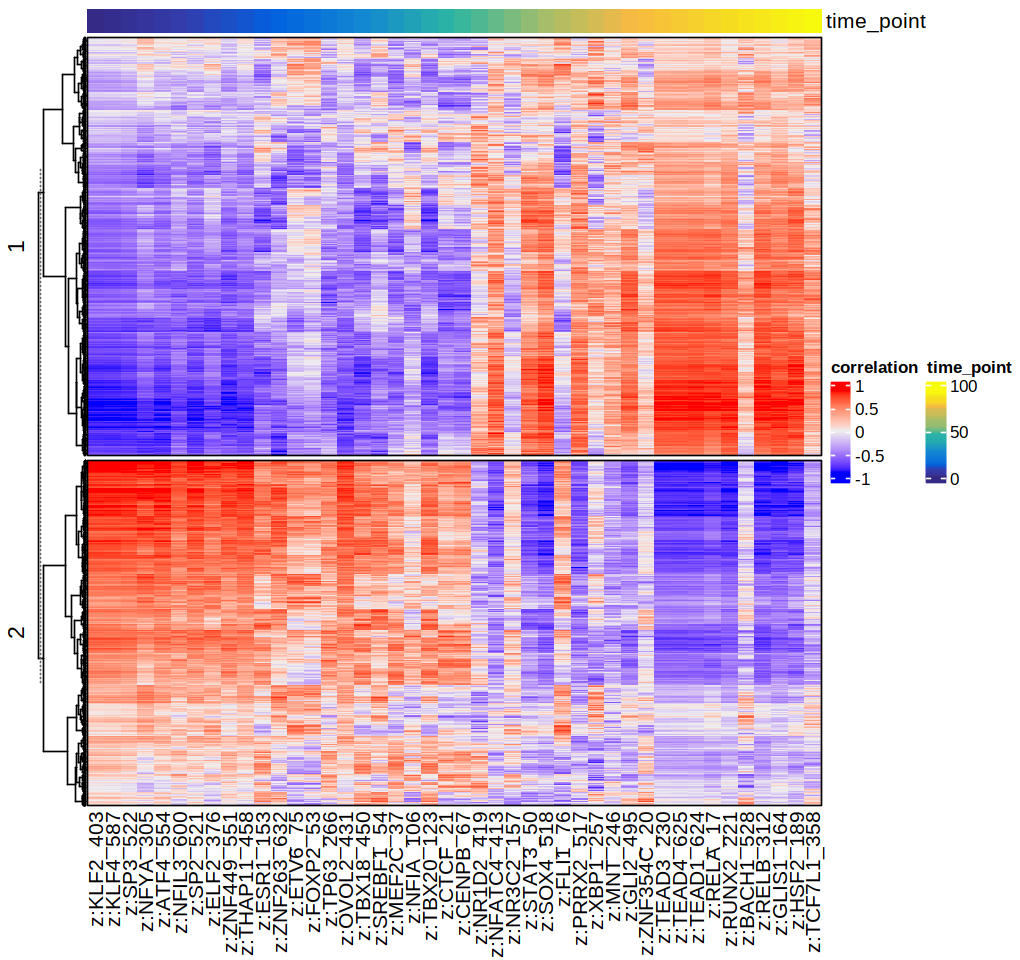

In [18]:
col_fun = colorRamp2(df_tf$time_point, 
                     ArchR::paletteContinuous(set = "blueYellow", n = 44))

column_ha <- HeatmapAnnotation(time_point = df_tf$time_point,
                              col = list(time_point = col_fun))

ht1 <- Heatmap(as.matrix(df_cor),
               name = "correlation",
               cluster_columns = FALSE,
             clustering_method_rows = "ward.D2",
               top_annotation = column_ha,
              show_row_names = FALSE,
                row_km = 2,
              border = TRUE)

options(repr.plot.width = 8.5, repr.plot.height = 8)

draw(ht1)

In [19]:
gene_cluster <- row_order(ht1)

gene_c1 <- rownames(df_cor[gene_cluster[[1]], ])
gene_c2 <- rownames(df_cor[gene_cluster[[2]], ])

df_gene <- lapply(1:length(gene_cluster), function(i){
    df <- rownames(df_cor[gene_cluster[[i]], ]) %>%
        as.data.frame()

    colnames(df) <- "gene"
    df$cluster <- i
    
    return(df)

}) %>% Reduce(rbind, .)

df_gene$cluster <- stringr::str_replace_all(df_gene$cluster, c("1" = "late_stage",
                                                              "2" = "early_stage"))

head(df_gene)

write.csv(df_gene, "../data/snATAC_SCARA5_Myofib/gene_cluster.csv")

Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`.”


,gene,cluster
,<chr>,<chr>
1,chr2:LTBP1,early_stage
2,chr12:NAA25,early_stage
3,chr22:BRD1,early_stage
4,chr5:KIF20A,early_stage
5,chr1:MPZL1,early_stage
6,chr2:RAPH1,early_stage


In [20]:
## we next use peak-to-gene links to predicte the target genes for each TF
mat_p2g <- df_p2g %>%
    select(c(peak_name, gene_name, Correlation)) %>%
    tidyr::pivot_wider(names_from = peak_name, values_from = Correlation) %>%
    textshape::column_to_rownames("gene_name")

mat_p2g[is.na(mat_p2g)] <- 0
mat_p2g[mat_p2g>0] <- 1

head(mat_p2g)

,chr3:142910259_142910759,chr3:142935981_142936481,chr3:142841914_142842414,chr3:142914361_142914861,chr3:142883049_142883549,chr3:142912721_142913221,chr3:142904567_142905067,chr3:142894224_142894724,chr3:142902245_142902745,chr3:142804592_142805092,⋯,chr3:194602937_194603437,chr3:194632632_194633132,chr3:194640814_194641314,chr3:194338248_194338748,chr1:35202011_35202511,chr1:35031730_35032230,chr1:35190842_35191342,chr1:35429569_35430069,chr1:35448426_35448926,chr1:35047355_35047855
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr3:PCOLCE2,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
chr8:SCARA5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr7:SDK1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:UAP1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr18:ZBTB7C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr20:PLCB1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
dim(mat_p2g)

[1]  1785 15203

In [22]:
## read motif matching results
motif_matching <- readRDS("../data/snATAC_SCARA5_Myofib/Annotations/Motif-Matches-In-Peaks.rds")

rowRanges <- rowRanges(motif_matching)

chr <- seqnames(rowRanges)
ranges <- as.data.frame(ranges(rowRanges))

matches <- as.matrix(assays(motif_matching)$matches)
colnames(matches) <- paste0("z:", colnames(matches))
rownames(matches) <- paste0(chr, ":", ranges$start, "_", ranges$end)

## only consider the selected TFs and gene-associated peaks
matches <- matches[colnames(mat_p2g), 
                   colnames(df_cor)]

head(matches)

,z:KLF2_403,z:KLF4_587,z:SP3_522,z:NFYA_305,z:ATF4_554,z:NFIL3_600,z:SP2_521,z:ELF2_376,z:ZNF449_551,z:THAP11_458,⋯,z:TEAD3_230,z:TEAD4_625,z:TEAD1_624,z:RELA_17,z:RUNX2_221,z:BACH1_528,z:RELB_312,z:GLIS1_164,z:HSF2_189,z:TCF7L1_358
chr3:142910259_142910759,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr3:142935981_142936481,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr3:142841914_142842414,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
chr3:142914361_142914861,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr3:142883049_142883549,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
chr3:142912721_142913221,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [23]:
dim(matches)

[1] 15203    44

In [24]:
## multiply gene by peak and peak by tf matrix to obtain gene by tf matrix
gene_tf <- as.matrix(mat_p2g) %*% as.matrix(matches)
head(gene_tf)

,z:KLF2_403,z:KLF4_587,z:SP3_522,z:NFYA_305,z:ATF4_554,z:NFIL3_600,z:SP2_521,z:ELF2_376,z:ZNF449_551,z:THAP11_458,⋯,z:TEAD3_230,z:TEAD4_625,z:TEAD1_624,z:RELA_17,z:RUNX2_221,z:BACH1_528,z:RELB_312,z:GLIS1_164,z:HSF2_189,z:TCF7L1_358
chr3:PCOLCE2,4,3,1,0,2,0,0,3,0,1,⋯,1,2,2,0,1,1,0,0,2,2
chr8:SCARA5,7,12,6,1,4,2,7,0,5,4,⋯,0,0,1,0,1,4,1,3,0,1
chr7:SDK1,0,0,0,1,0,0,0,0,0,1,⋯,2,2,2,0,0,3,1,0,0,0
chr1:UAP1,7,6,4,3,3,2,3,0,2,3,⋯,0,0,0,0,0,2,0,0,1,3
chr18:ZBTB7C,5,8,5,0,2,1,2,0,0,1,⋯,2,2,3,1,0,2,1,0,1,3
chr20:PLCB1,3,4,3,0,1,3,2,0,1,0,⋯,2,2,2,1,0,1,0,0,0,1


In [25]:
## we binarize this matrix to indicate if a gene is regulated by a TF through a peak
gene_tf[gene_tf>0] <- 1

In [26]:
## here we multiply correlation matrix and regulation matrix
df_cor <- df_cor * gene_tf
head(df_cor)

,z:KLF2_403,z:KLF4_587,z:SP3_522,z:NFYA_305,z:ATF4_554,z:NFIL3_600,z:SP2_521,z:ELF2_376,z:ZNF449_551,z:THAP11_458,⋯,z:TEAD3_230,z:TEAD4_625,z:TEAD1_624,z:RELA_17,z:RUNX2_221,z:BACH1_528,z:RELB_312,z:GLIS1_164,z:HSF2_189,z:TCF7L1_358
chr3:PCOLCE2,0.9462578,0.9476462,0.9405444,0.0000000,0.9121518,0.0000000,0.0000000,0.7645778,0.0000000,0.8967850,⋯,-0.9007448,-0.9074251,-0.9155763,0.0000000,-0.9097790,-0.20450518,0.0000000,0.0000000,-0.9006258,-0.4300817
chr8:SCARA5,0.8932774,0.8945874,0.8825695,0.8901375,0.9212503,0.7392352,0.8558632,0.0000000,0.7628242,0.8467384,⋯,0.0000000,0.0000000,-0.8186753,0.0000000,-0.8597217,-0.10293664,-0.8569001,-0.8445819,0.0000000,-0.2523132
chr7:SDK1,0.0000000,0.0000000,0.0000000,0.8908418,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8041331,⋯,-0.7975422,-0.7973275,-0.7997482,0.0000000,0.0000000,0.04960936,-0.8159548,0.0000000,0.0000000,0.0000000
chr1:UAP1,0.8925987,0.8894230,0.8853969,0.9007608,0.9156030,0.7485888,0.8721653,0.0000000,0.7912057,0.8452752,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-0.08004361,0.0000000,0.0000000,-0.7982840,-0.2299835
chr18:ZBTB7C,0.9250052,0.9190034,0.9178634,0.0000000,0.9181343,0.7941387,0.8909824,0.0000000,0.0000000,0.9096585,⋯,-0.8812973,-0.8919326,-0.8829434,-0.8159494,0.0000000,-0.22655132,-0.8828278,0.0000000,-0.8437769,-0.3831015
chr20:PLCB1,0.8953535,0.8996066,0.8648322,0.0000000,0.8683037,0.6121266,0.8581134,0.0000000,0.8178021,0.0000000,⋯,-0.8194153,-0.8224124,-0.8394498,-0.7457554,0.0000000,0.01327743,0.0000000,0.0000000,0.0000000,-0.2779741


In [27]:
suppressMessages(library(igraph))

In [28]:
df_cor <- as.data.frame(df_cor)

In [29]:
df_cor$gene <- rownames(df_cor)
head(df_cor)

,z:KLF2_403,z:KLF4_587,z:SP3_522,z:NFYA_305,z:ATF4_554,z:NFIL3_600,z:SP2_521,z:ELF2_376,z:ZNF449_551,z:THAP11_458,⋯,z:TEAD4_625,z:TEAD1_624,z:RELA_17,z:RUNX2_221,z:BACH1_528,z:RELB_312,z:GLIS1_164,z:HSF2_189,z:TCF7L1_358,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr3:PCOLCE2,0.9462578,0.9476462,0.9405444,0.0000000,0.9121518,0.0000000,0.0000000,0.7645778,0.0000000,0.8967850,⋯,-0.9074251,-0.9155763,0.0000000,-0.9097790,-0.20450518,0.0000000,0.0000000,-0.9006258,-0.4300817,chr3:PCOLCE2
chr8:SCARA5,0.8932774,0.8945874,0.8825695,0.8901375,0.9212503,0.7392352,0.8558632,0.0000000,0.7628242,0.8467384,⋯,0.0000000,-0.8186753,0.0000000,-0.8597217,-0.10293664,-0.8569001,-0.8445819,0.0000000,-0.2523132,chr8:SCARA5
chr7:SDK1,0.0000000,0.0000000,0.0000000,0.8908418,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8041331,⋯,-0.7973275,-0.7997482,0.0000000,0.0000000,0.04960936,-0.8159548,0.0000000,0.0000000,0.0000000,chr7:SDK1
chr1:UAP1,0.8925987,0.8894230,0.8853969,0.9007608,0.9156030,0.7485888,0.8721653,0.0000000,0.7912057,0.8452752,⋯,0.0000000,0.0000000,0.0000000,0.0000000,-0.08004361,0.0000000,0.0000000,-0.7982840,-0.2299835,chr1:UAP1
chr18:ZBTB7C,0.9250052,0.9190034,0.9178634,0.0000000,0.9181343,0.7941387,0.8909824,0.0000000,0.0000000,0.9096585,⋯,-0.8919326,-0.8829434,-0.8159494,0.0000000,-0.22655132,-0.8828278,0.0000000,-0.8437769,-0.3831015,chr18:ZBTB7C
chr20:PLCB1,0.8953535,0.8996066,0.8648322,0.0000000,0.8683037,0.6121266,0.8581134,0.0000000,0.8178021,0.0000000,⋯,-0.8224124,-0.8394498,-0.7457554,0.0000000,0.01327743,0.0000000,0.0000000,0.0000000,-0.2779741,chr20:PLCB1


In [48]:
df_cor_2 <- df_cor %>%
    tidyr::pivot_longer(!gene, names_to = "tf", values_to = "correlation") %>%
    subset(correlation > 0.4)

df_cor_2 <- df_cor_2[, c("tf", "gene", "correlation")]

# ## we further remove genes with -AS1
df_cor_2 <- df_cor_2[!grepl("-AS", df_cor_2$gene), ]

## update tf and gene name
df_cor_2$tf <- stringr::str_split_fixed(df_cor_2$tf, ":", 2)[, 2]
df_cor_2$tf <- stringr::str_split_fixed(df_cor_2$tf, "_", 2)[, 1]
df_cor_2$gene <- stringr::str_split_fixed(df_cor_2$gene, ":", 2)[, 2]

head(df_cor_2)

write.csv(df_cor_2, "../data/snATAC_SCARA5_Myofib/gene_regulatory_network.csv", row.names = FALSE)

tf,gene,correlation
<chr>,<chr>,<dbl>
KLF2,PCOLCE2,0.9462578
KLF4,PCOLCE2,0.9476462
SP3,PCOLCE2,0.9405444
ATF4,PCOLCE2,0.9121518
ATF4,SCARA5,0.9212503
NFYA,UAP1,0.9007608


In [49]:
g <- graph_from_data_frame(df_cor_2, directed=FALSE)

In [50]:
tf_colors <- ArchR::paletteContinuous(set = "blueYellow", n = 44)
names(tf_colors) <- df_tf$name1

gene_colors <- rep("white", length(unique(df_cor_2$gene)))
names(gene_colors) <- unique(df_cor_2$gene)

vertex.color <- c(tf_colors, gene_colors)

In [51]:
tf_colors <- ArchR::paletteContinuous(set = "blueYellow", n = 44)
names(tf_colors) <- df_tf$name1

gene_colors <- rep("black", length(unique(df_cor_2$gene)))
names(gene_colors) <- unique(df_cor_2$gene)

vertex.frame.color <- c(tf_colors, gene_colors)

In [52]:
## compute layout
set.seed(42)
co <- layout_with_fr(g, dim = 2, niter = 1000)
#co <- layout_with_graphopt(g, niter = 1000)

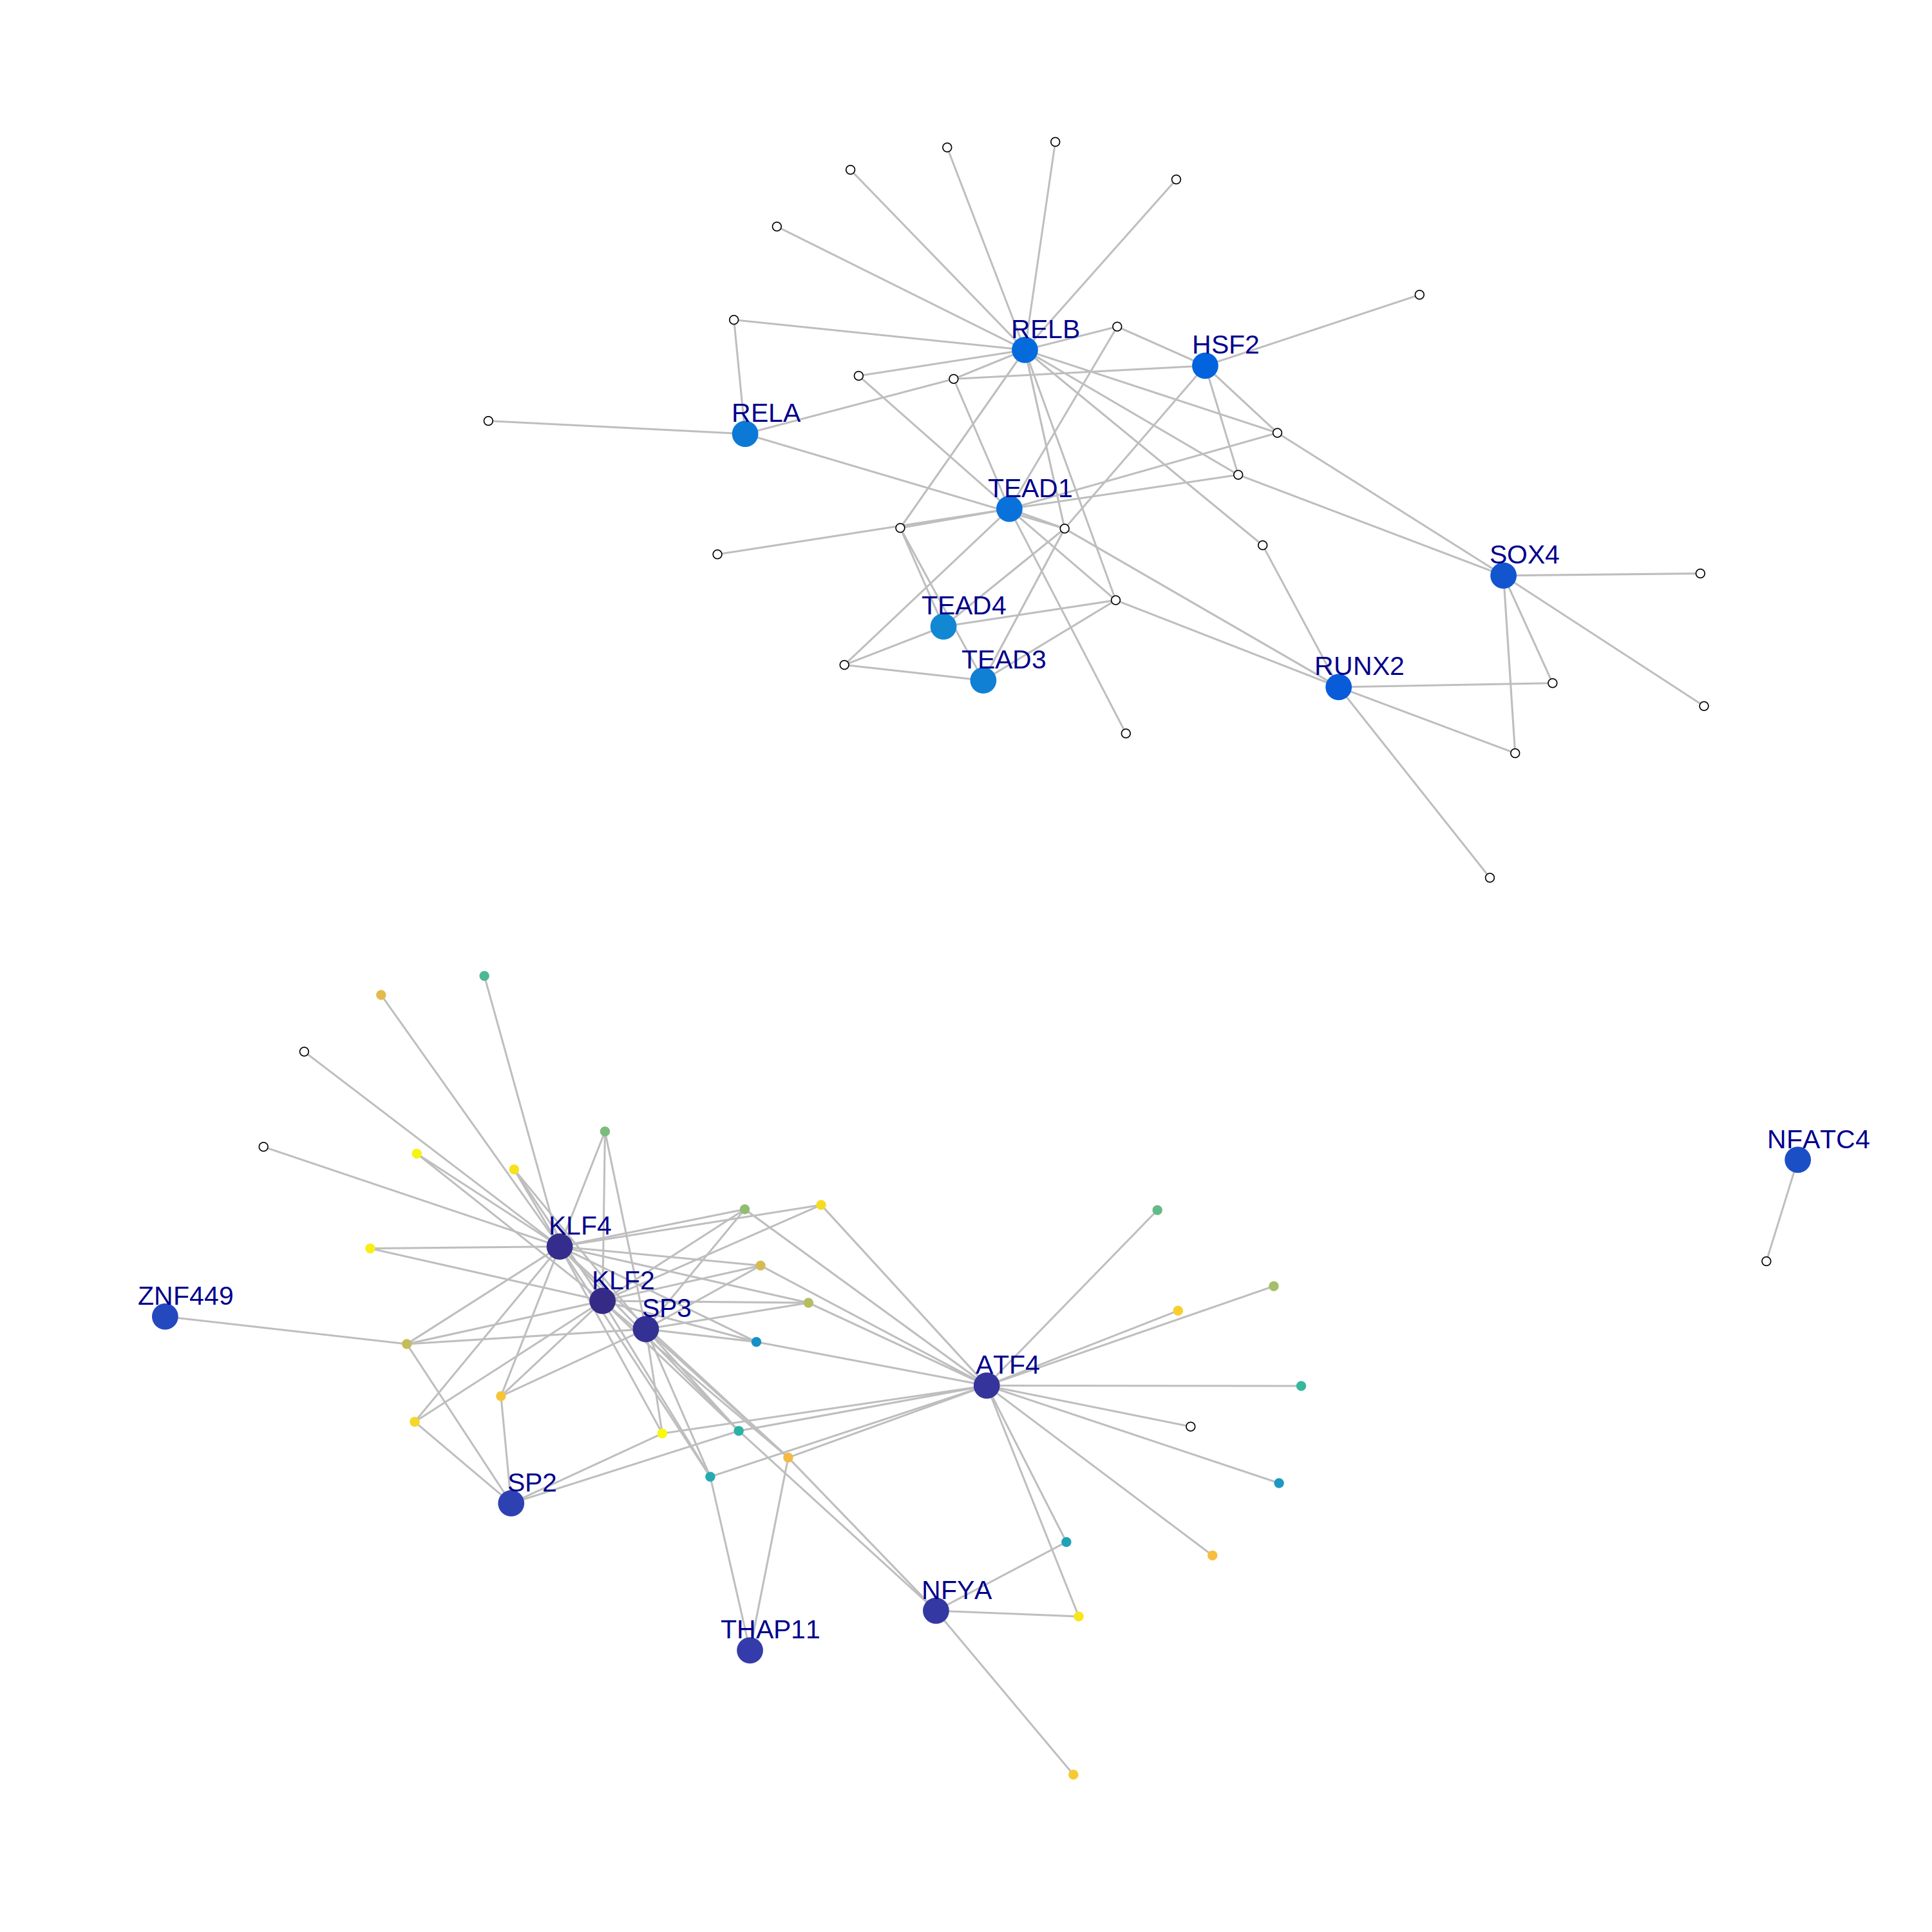

In [54]:
## only show labels for TF
V(g)$label <- ifelse(V(g)$name %in% df_cor_2$tf, V(g)$name, NA)

## for TFs, we increase the size of nodes
V(g)$size <- ifelse(V(g)$name %in% df_cor_2$tf, 3, 1)

E(g)$weight <- E(g)$correlation

options(repr.plot.height = 25, repr.plot.width = 25)

plot(g, layout = co, 
     vertex.color = vertex.color,
     vertex.frame.color = vertex.frame.color,
     vertex.label.dist = 0.5,
     edge.width = E(g)$weight*2,
     vertex.label.cex = 2,
     edge.color = adjustcolor("gray", alpha = 1),
     edge.curved=seq(-1, 1, length = ecount(g))
    )

In [39]:
pdf("grn.pdf", height = 20, width = 20)
plot(g, layout = co, 
     vertex.color = vertex.color,
     vertex.frame.color = vertex.frame.color,
     vertex.label.dist = 0.5,
     vertex.label.cex = 2,
     edge.color = adjustcolor("gray", alpha = 1),
     edge.curved=seq(-1, 1, length = ecount(g))
    )
dev.off()

png 
  2

In [40]:
sel.tfs <- intersect(df_cor_2$tf, df_cor_2$gene)
sel.tfs

[1] "KLF2"  "ELF2"  "ESR1"  "TBX20" "NFIA"  "TEAD3"

In [41]:
df_cor_3 <- subset(df_cor_2, gene %in% sel.tfs)

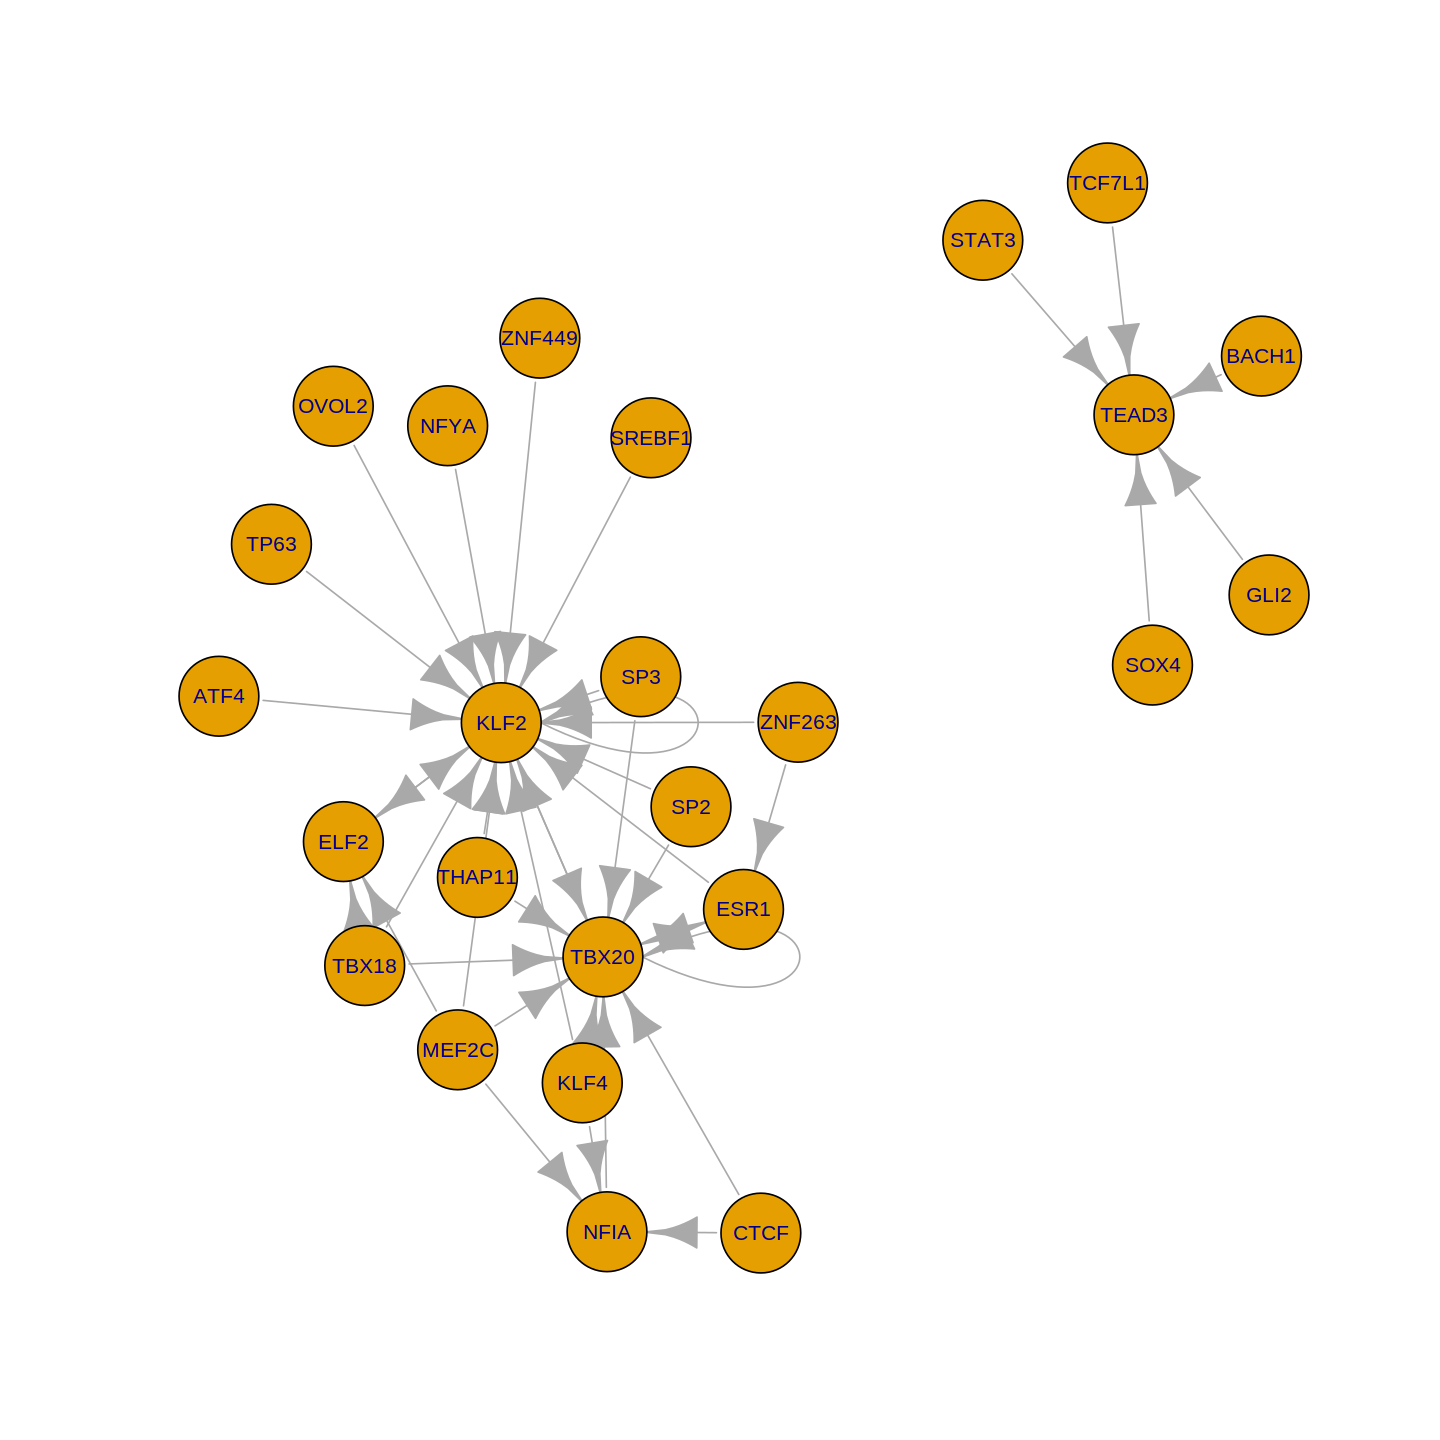

In [47]:
g <- graph_from_data_frame(df_cor_3, directed=TRUE)
co <- layout_with_fr(g, dim = 2, niter = 1000)

options(repr.plot.height = 12, repr.plot.width = 12)

plot(g, layout = co)

In [ ]:
write.csv(df_cor_3, "../data/snATAC_SCARA5_Myofib/tf_tf_network.csv", row.names = FALSE)